# Amazon Case

# 1.- FUNCIONES

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(4, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()

## 2.- PROCEDIMIENTO

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
df = pd.read_excel('SMU559-XLS-ENG.xlsx', sheet_name ='Raw Data')
features = pd.read_excel('SMU559-XLS-ENG.xlsx', sheet_name ='Variable Dictionary',  header = 1)
# Creating a new dataset with complete descriptions for easier interpretation of results.
features = dict(zip(features.Variable,features.Description))
df_names = df.rename(columns=features)

We'll keep companies with 200 datapoints for the sake of simplicity, the rest might not be comparable.

In [5]:
df['company_v'].value_counts().loc[lambda x : x==200]
df_names['Companies - Open-end'].value_counts().loc[lambda x : x==200]

Companies - Open-end
ZALORA          200
EBAY            200
AMAZON          200
QOO10           200
FAVE            200
CAROUSELL       200
TAOBAO/TMALL    200
Name: count, dtype: int64

In [6]:
df = df.groupby('company_v').filter(lambda x: len(x) == 200)
df_names = df_names.groupby('Companies - Open-end').filter(lambda x: len(x) == 200)

In [7]:
df.head()

,uid,company_v,poverq,soverq,pq,satis,repur,recomm,Q19,VN_1009_Q20A,...,race,work,pincome,income,educat,childsupp,marital,gender,house,DOI
0,5,ZALORA,9,7,6,7,6,5,0,8,...,1,1,2,4,8,1,2,1,2,1/29/2018
1,11,FAVE,7,8,8,7,7,6,0,8,...,1,1,2,4,7,99,1,1,2,1/29/2018
2,15,FAVE,6,7,7,6,6,6,0,7,...,1,1,4,5,8,2,2,2,3,2018-01-02 00:00:00
3,19,AMAZON,8,8,7,8,8,6,0,8,...,1,1,3,5,8,2,2,2,3,2018-01-02 00:00:00
4,20,QOO10,7,6,8,8,6,5,0,7,...,1,1,4,5,8,2,2,1,3,2018-01-02 00:00:00


In [8]:
df_names.columns

Index(['Unique ID', 'Companies - Open-end', 'Overall Product Quality',
       'Overall Service Quality', 'Price given quality',
       'Customer Satisfaction', 'Likelihood to Repurchase',
       'Likelihood to recommend',
       'Recommended ecommerce site to family and friends in the last 3 months',
       'Overall experiences SATISFACTION with (INSERT NAME)',
       'Variety of products that interests me',
       'Variety of products that meet my needs',
       'Ease of navigating the website or app',
       'Ease of finding the products you need', 'Availability of products',
       'Attractiveness of promotions and discounts offered',
       'Sufficiency of Product information', 'Ease of comparing products',
       'Ease of indicating special requests',
       'Ease of managing your shopping cart', 'Check-out and payment process',
       'Security of website',
       'Clarity and usefulness of information on your delivery methods and fees',
       'Range of delivery options', 'Ease 

In [9]:
df_names.describe()

,Unique ID,Overall Product Quality,Overall Service Quality,Price given quality,Customer Satisfaction,Likelihood to Repurchase,Likelihood to recommend,Recommended ecommerce site to family and friends in the last 3 months,Overall experiences SATISFACTION with (INSERT NAME),Variety of products that interests me,...,General Shopping Behavior: Usually make most purchases on physical store or an online store,Age,Race of the respondent,Employment status of the respondent,Monthly Household Income,Education Qualification,No. of children dependent for financial support,Marital Status,Gender,Housetype according to respondent
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,2979.320000,7.592857,7.574286,7.610000,7.607143,7.442143,7.292143,0.249286,7.687857,7.872857,...,2.227143,35.308571,1.417143,1.348571,13.500000,7.263571,38.240714,1.632857,1.454286,3.386429
std,1719.666452,1.370560,1.310396,1.351424,1.183013,1.276979,1.346245,0.432754,1.232916,1.038697,...,0.794805,8.356885,0.939328,0.974990,25.499387,1.165915,46.514894,0.486625,0.498084,1.064047
min,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,3.000000,...,1.000000,18.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,1507.500000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.000000,7.000000,7.000000,...,2.000000,29.000000,1.000000,1.000000,5.000000,7.000000,2.000000,1.000000,1.000000,3.000000
50%,2891.500000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,0.000000,8.000000,8.000000,...,2.000000,34.000000,1.000000,1.000000,6.000000,7.000000,3.000000,2.000000,1.000000,3.000000
75%,4427.500000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.000000,8.000000,9.000000,...,3.000000,42.000000,1.000000,1.000000,7.000000,8.000000,99.000000,2.000000,2.000000,4.000000
max,6087.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,...,3.000000,66.000000,5.000000,6.000000,98.000000,9.000000,99.000000,3.000000,2.000000,6.000000


In [11]:
pd.set_option('display.max_columns', None)

In [15]:
corrMatrix = df_names.corr(numeric_only = True)

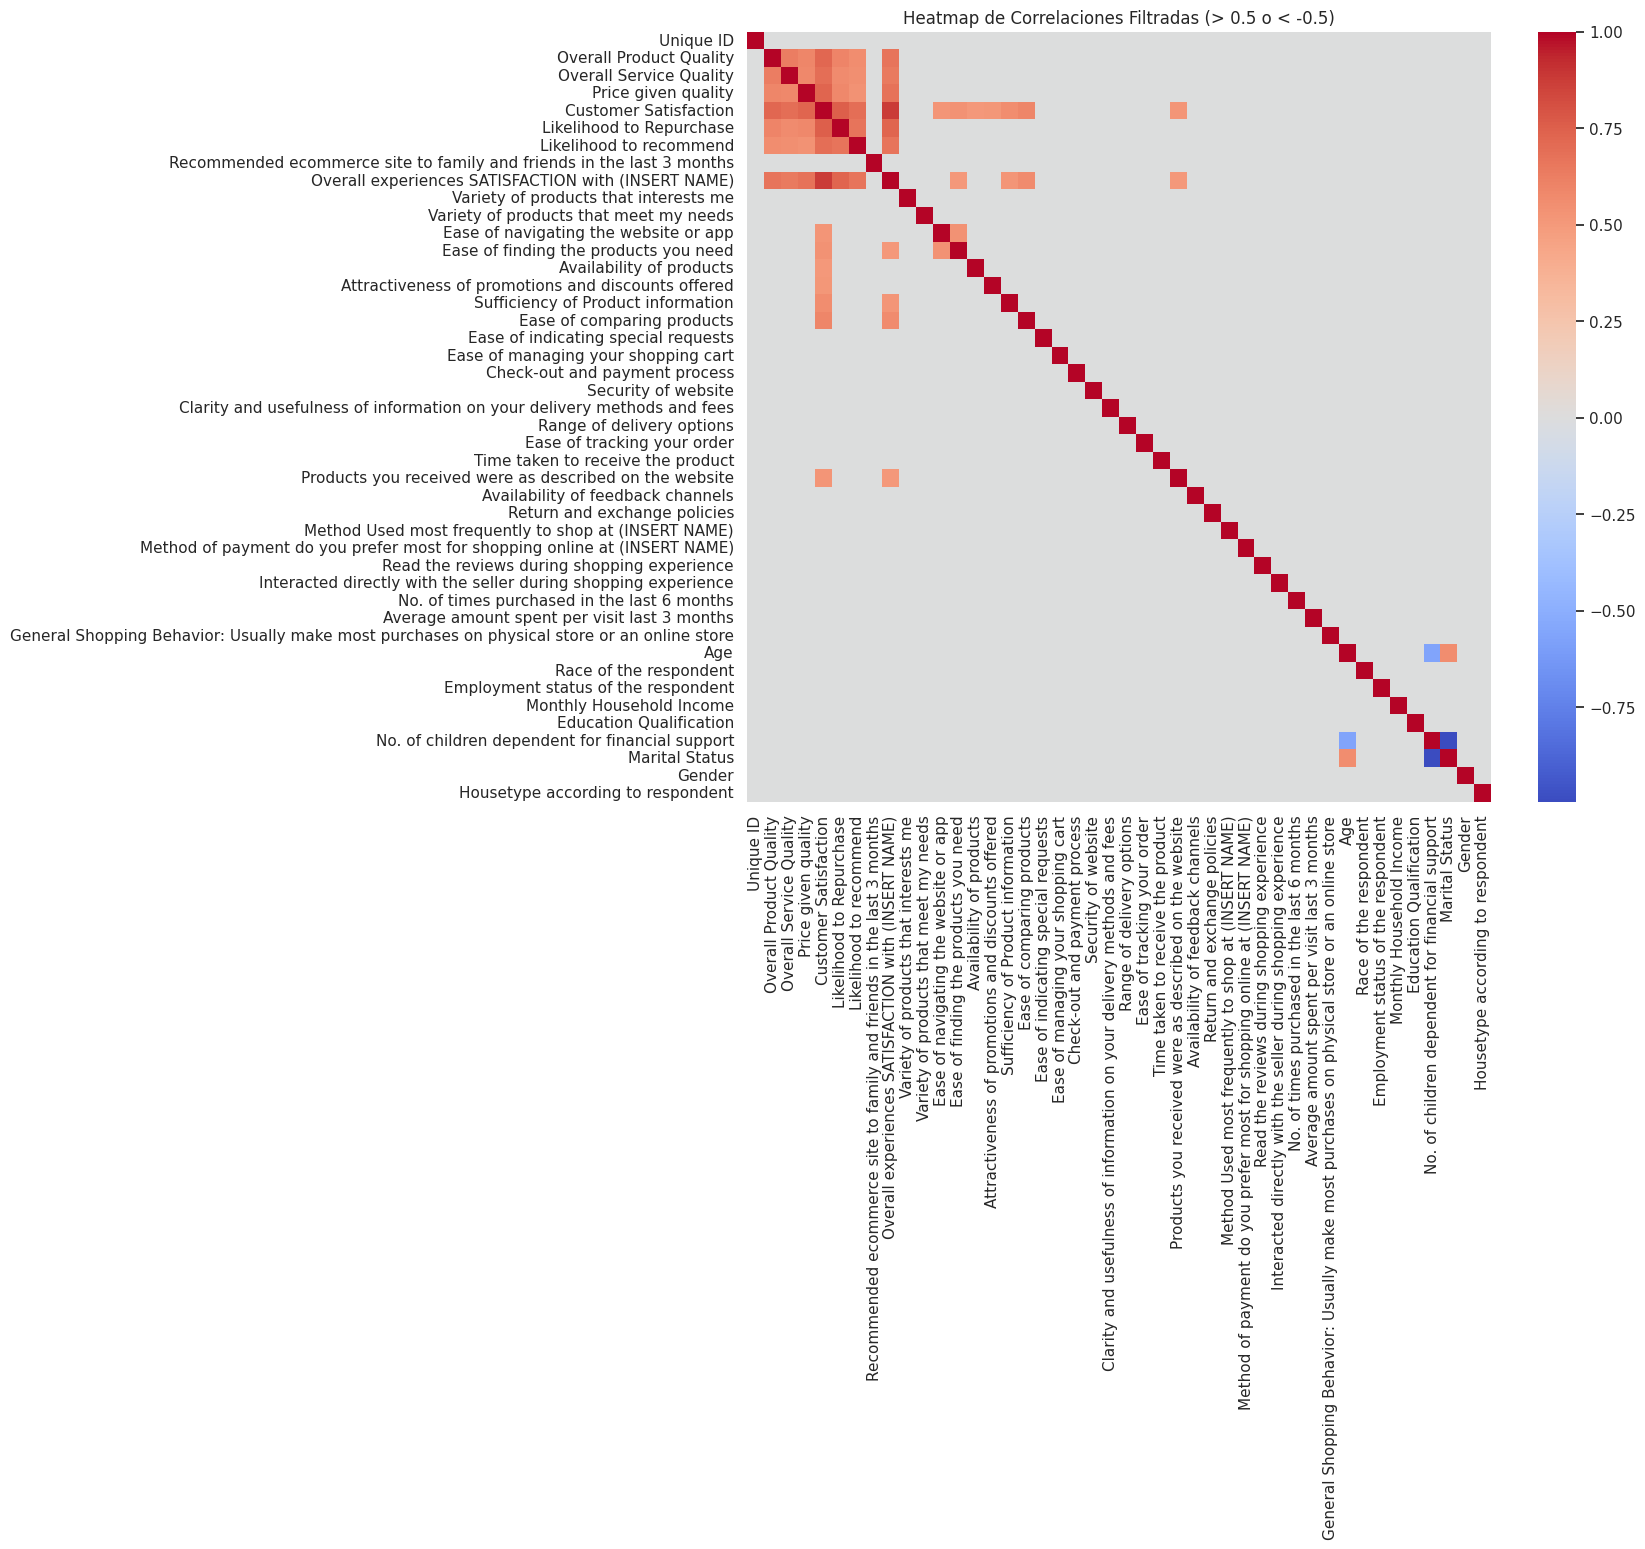

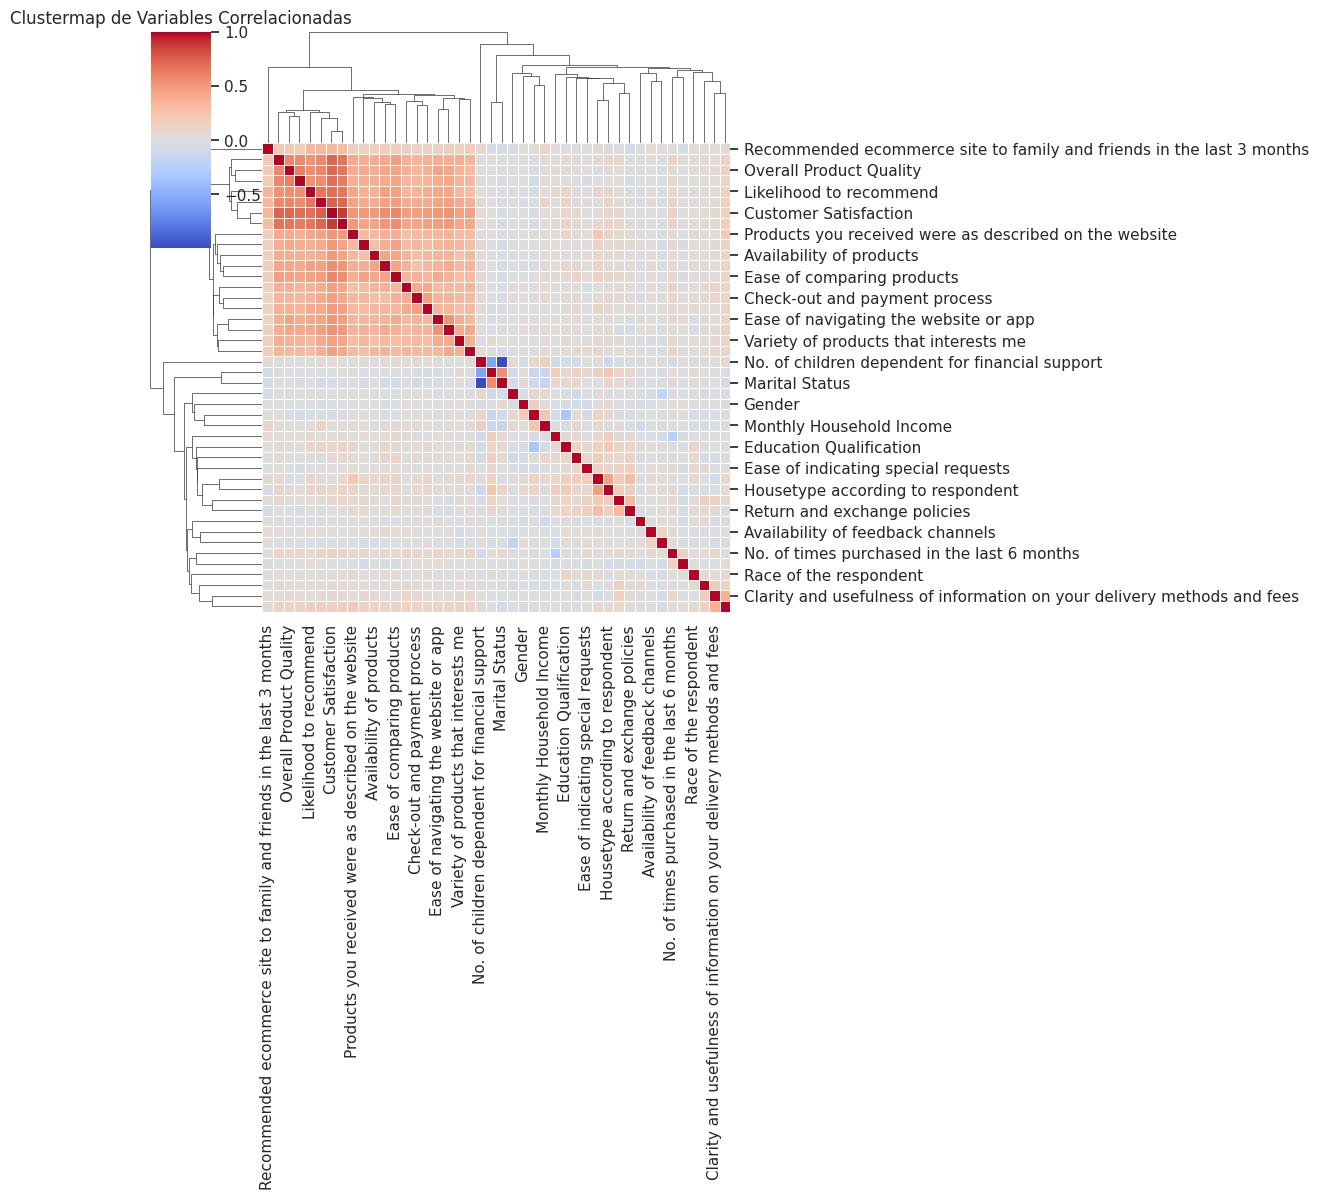

In [25]:
corr_filtered = corrMatrix.copy()
corr_filtered[(corr_filtered < 0.5) & (corr_filtered > -0.5)] = 0

# Visualización optimizada del heatmap filtrado
plt.figure(figsize=(12, 10))
sns.heatmap(corr_filtered, cmap="coolwarm", cbar=True)
plt.title("Heatmap de Correlaciones Filtradas (> 0.5 o < -0.5)")
plt.show()

# Generar un Clustermap para agrupar variables correlacionadas
sns.clustermap(corrMatrix, cmap="coolwarm", linewidths=0.5, figsize=(12, 12))
plt.title("Clustermap de Variables Correlacionadas")
plt.show()

1. Companies often benchmark themselves on various key performance indicators’ ratings. How does Amazon.com perform on these key metrics as compared to its competitors? 

 - Customer Satisfaction - satis
 - Willingness to Recommend - recomm
 - Average customer spend - Q9D
 - Frequency of visit - Q9C_P


#### Gráfico generado en PowerBI

![title](Captura.png)

#### Podemos ver que AMAZON se encuentra en último lugar en su score de calidad de productos y en su indicador de NPS

2. From the data, what are the reasons for Amazon’s performance ratings? 
- Which areas did Amazon perform poorly in? 
- Which areas did Amazon perform well in? 


In [26]:
df.columns

Index(['Unique ID', 'Companies - Open-end', 'Overall Product Quality',
       'Overall Service Quality', 'Price given quality',
       'Customer Satisfaction', 'Likelihood to Repurchase',
       'Likelihood to recommend',
       'Recommended ecommerce site to family and friends in the last 3 months',
       'Overall experiences SATISFACTION with (INSERT NAME)',
       'Variety of products that interests me',
       'Variety of products that meet my needs',
       'Ease of navigating the website or app',
       'Ease of finding the products you need', 'Availability of products',
       'Attractiveness of promotions and discounts offered',
       'Sufficiency of Product information', 'Ease of comparing products',
       'Ease of indicating special requests',
       'Ease of managing your shopping cart', 'Check-out and payment process',
       'Security of website',
       'Clarity and usefulness of information on your delivery methods and fees',
       'Range of delivery options', 'Ease 

#### Comparamos la diferencia relativa en los promedios del puntaje obtenido de AMAZON respecto al resto de compañías. De esta manera, una diferencia relativa negativa indica un rendimiento menor por parte de de AMAZON respecto al resto de compañías, y por tanto explican 

##### Primero, me quedo con las variables que representan puntajes

In [81]:
df_2 = df_names[['Companies - Open-end', 'Overall Product Quality', 'Overall Service Quality', 'Price given quality', 'Customer Satisfaction', 'Likelihood to Repurchase', 'Likelihood to recommend', 'Recommended ecommerce site to family and friends in the last 3 months', 'Overall experiences SATISFACTION with (INSERT NAME)', 'Variety of products that interests me', 'Variety of products that meet my needs', 'Ease of navigating the website or app', 'Ease of finding the products you need', 'Availability of products', 'Attractiveness of promotions and discounts offered', 'Sufficiency of Product information', 'Ease of comparing products', 'Ease of indicating special requests', 'Ease of managing your shopping cart', 'Check-out and payment process', 'Security of website', 'Clarity and usefulness of information on your delivery methods and fees', 'Range of delivery options', 'Ease of tracking your order', 'Time taken to receive the product', 'Products you received were as described on the website', 'Availability of feedback channels', 'Return and exchange policies', 'Satisfaction with the product reviews', 'Satisfaction with the channels available to communicate with the seller(s)']]

In [82]:
df_2_amazon = df_2[df_2['Companies - Open-end'] == 'AMAZON']
df_2_else = df_2[df_2['Companies - Open-end'] != 'AMAZON']

In [83]:
df_2_amazon = df_2_amazon.describe().reset_index()
df_2_else = df_2_else.describe().reset_index()

In [84]:
# Me quedo con el promedio de todos los puntajes
df_2_amazon = df_2_amazon[df_2_amazon['index'] == 'mean']
df_2_else = df_2_else[df_2_else['index'] == 'mean']

In [85]:
# Traspongo y uno las tablas
final_df = pd.melt(df_2_amazon, id_vars = ['index']).merge(pd.melt(df_2_else, id_vars = ['index']), on = 'variable')

In [86]:
final_df['relative_dif'] = (final_df['value_x'] - final_df['value_y']) / final_df['value_x']

In [87]:
final_df = final_df.rename(columns = {
    'value_x' : 'Promedio Amazon',
    'index_y' : 'Métrica',
    'value_y' : 'Promedio otras empresas',
    'relative_dif' : 'Diferencia relativa de promedios'
})

In [88]:
final_df = final_df[['variable', 'Promedio Amazon','Métrica','Promedio otras empresas','Diferencia relativa de promedios']]

In [89]:
final_df_2 = final_df[['variable', 'Diferencia relativa de promedios']]
final_df_2 = final_df_2.sort_values('Diferencia relativa de promedios')

<Axes: xlabel='Diferencia relativa de promedios', ylabel='variable'>

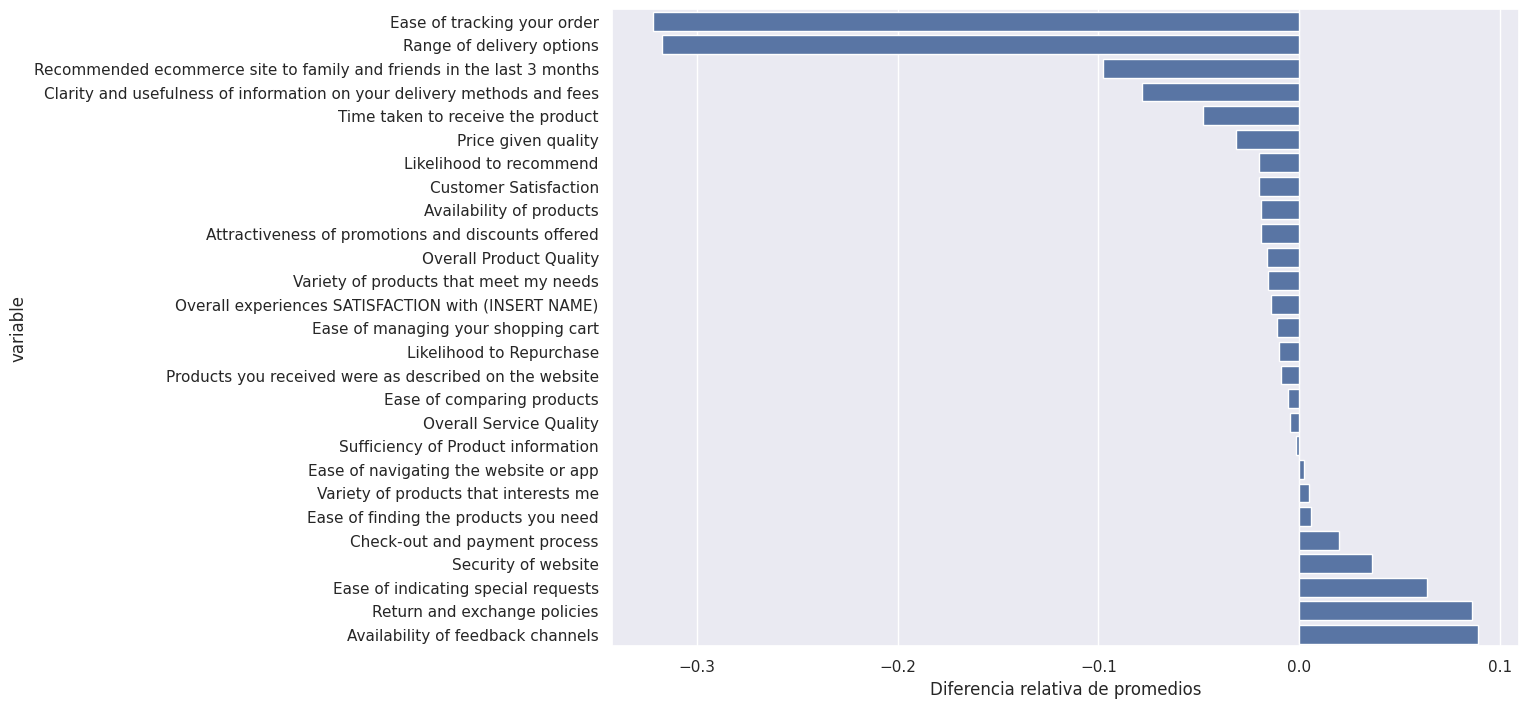

In [91]:
sns.barplot(final_df_2, x="Diferencia relativa de promedios", y="variable",legend=False)

3. What should Amazon do to improve its customer satisfaction performance?

4. Compare the performance of Amazon with that of Qoo10. 
- How is Qoo10 performing relative to Amazon? 
- What should Amazon do to improve its performance? 
- What should Amazon do to better compete with Qoo10? 
